<a href="https://colab.research.google.com/github/ritu-kumar/Machine-learning-projects/blob/main/Breast_Cancer_Classification_with_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data_frame.shape

(569, 30)

In [7]:
data_frame['label'] = breast_cancer_dataset.target

In [8]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [9]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [10]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [11]:
x = data_frame.drop(columns = 'label', axis = 1)
y= data_frame['label']
print(x,y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 34)
print(x_train.shape)

(455, 30)


In [24]:
# Standarising of data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std =scaler.transform(x_test)

Building a neural network

In [25]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [26]:
# Setting us the layers of neural network
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(30,)),
     keras.layers.Dense(20, activation ='relu'),
    #  relu stands for rectified linear unit
     keras.layers.Dense(2, activation = 'sigmoid')
])
# Here, flatten layer is first layer of neural network, say input layer; second and third are hidden layer and output layer, respectively.

When training a ml model, we feed the data in matrix form of MxN order and it interprets it. 
But while training a neural network i.e. NN, we need to feed it 1-D data. So, matrix need to be flattened.
For hidden layer, 20 stands for 20 neurons and for output layer, 2 stands for 2 output neurons. 
No. of output neurons depends upon classes of data, for above data, we have 2 classes, two types of cancer. For data with 10 classes, it will be 10.
At a tiem, only one neuron will be fired.


In [27]:
# Compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# When using outputs as 0, 1 etc, use loss as sparse categorical crossentropy.
# Foe one nor encoding categories, use categorical cross entropy.

dog = 1
cat =2
horse =3
use sparse 

dog = [0 0 1]
cat = [0 1 0]
horse  =[1 0 0]
use categorical cross entropy


In [28]:
# Training the neural network
history = model.fit(x_train, y_train, validation_split = 0.1, epochs  =10)


# Here, validation split is like splitting the test data from training data. Epochs means howmany times model has to g through the data.

Epoch 1/10
13/13 [==============================] - 1s 18ms/step - loss: 50.2009 - accuracy: 0.3814 - val_loss: 25.0991 - val_accuracy: 0.3913
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 8.5516 - accuracy: 0.6748 - val_loss: 4.2835 - val_accuracy: 0.8913
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 3.9617 - accuracy: 0.8606 - val_loss: 4.0753 - val_accuracy: 0.8696
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 2.0019 - accuracy: 0.8753 - val_loss: 1.9871 - val_accuracy: 0.7391
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 1.6260 - accuracy: 0.8606 - val_loss: 1.9798 - val_accuracy: 0.9130
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 1.4933 - accuracy: 0.8998 - val_loss: 1.8840 - val_accuracy: 0.8478
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 1.4606 - accuracy: 0.8729 - val_loss: 1.8234 - val_accuracy: 0.8478
Epoch 8/10
13/13 

Here, loss function keeps on decreasing and accuracy keeps on increasing.

Had chosen logistic regression model ,accuracy score would have been 80-90%. 
For NN, the data was not standarised, thus giving lesser accuracy.

Applying standard scaler function to dataset:

In [29]:
# Training NN on standarised data:
history = model.fit(x_train_std, y_train, validation_split = 0.1, epochs  =10)


Epoch 1/10
13/13 [==============================] - 0s 15ms/step - loss: 1.2042 - accuracy: 0.4572 - val_loss: 1.0879 - val_accuracy: 0.5652
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.7230 - accuracy: 0.6773 - val_loss: 0.6730 - val_accuracy: 0.7174
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.4450 - accuracy: 0.7848 - val_loss: 0.4488 - val_accuracy: 0.8043
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2955 - accuracy: 0.8680 - val_loss: 0.3435 - val_accuracy: 0.8478
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2233 - accuracy: 0.9169 - val_loss: 0.2853 - val_accuracy: 0.9130
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1819 - accuracy: 0.9438 - val_loss: 0.2520 - val_accuracy: 0.9130
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1560 - accuracy: 0.9584 - val_loss: 0.2315 - val_accuracy: 0.9130
Epoch 8/10
13/13 [=

For training any model, our goal is to reduce loss value and increase accuracy value. Loss function simply means difference between true value and predicted value.

<function matplotlib.pyplot.show(close=None, block=None)>

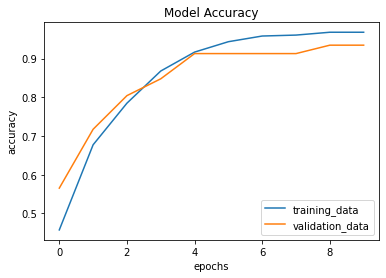

In [30]:
# Visualising the accuracy and loss data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training_data', 'validation_data'], loc = 'lower right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

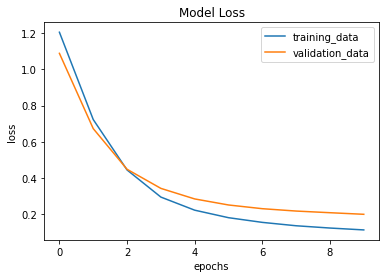

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training_data', 'validation_data'], loc = 'upper right')
plt.show

In [32]:
# Accuracy of data
loss, accuracy = model.evaluate(x_test_std, y_test)
print(accuracy)
print(loss)

4/4 [==============================] - 0s 3ms/step - loss: 0.0990 - accuracy: 0.9737
0.9736841917037964
0.0990409404039383


In [34]:
# Building an predictive system for NN 
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[-0.12733753  0.34904839 -0.08142153 -0.22751126  1.60028176  1.09983309
  0.05707216  0.27000616  1.37493625  1.69573351  0.6969142   0.29620982
  0.52710181  0.28768154  0.60662979  0.25614533 -0.23980049  0.45112429
 -0.67075077  0.67684325  0.1659731   0.39996793  0.09915155  0.03749023
  1.46732447  0.69069278 -0.02830759  0.60729517  0.43210336  1.67698852]


In [35]:
y_prediction = model.predict(x_test_std)
print(y_prediction.shape)
print(y_prediction[0])

4/4 [==============================] - 0s 3ms/step
(114, 2)
[0.4883649  0.22549528]


In [36]:
# Here, prediction value is not giving an binary answer whether the cancer is malingnant or not. It is telling simply the probability of each type.
# Thus for given data, probability of it being 0 is 0.48 and not being 0 is 0.225

In [37]:
# To convert the probability in class labels
y_prediction_labels = [np.argmax(i) for i in y_prediction]
print(y_prediction_labels)
# Argmax uses the maximum value as output.

[0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1]


In [43]:
# Building the predictive system
input_data = (13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151)


# converting input data as numpy array
input_data_array = np.asarray(input_data)

# Reshaping of input data as predicting for one data point
input_data_reshaped = input_data_array.reshape(1,-1)

# Standarising of input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)
# Above prediction is still as probability function.

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0]==0):
  print('Malignant')
else:
  print("Benign")

1/1 [==============================] - 0s 35ms/step
[[0.4883649  0.22549528]]
[0]
Malignant


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
